
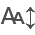

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [10]:
df = pd.read_csv('Avocado.csv')
df.head(3)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany

In [17]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [9]:
df['AveragePrice'].head()

AveragePrice
Loading ITables v2.2.4 from the init_notebook_mode cell... (need help?)


In [ ]:
#atl_df = df[df['region'] == 'Atlanta']
atl_df = df.copy()[df['region'] == 'Atlanta']
# these two lines essentially do the same thing, but later on if you try to set values using the 
#"copy" of the slice of df then it will give you warnings saying that warning: a copy of a slice
#is being used to set values or something like that and to remember that value
#changes may not carry over between the dataframes
atl_df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

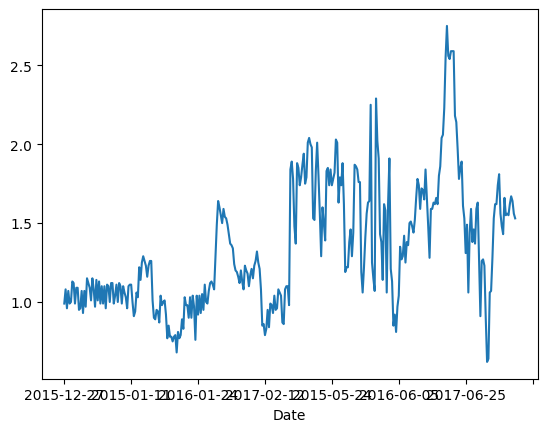

In [19]:
atl_df['AveragePrice'].plot()

/var/folders/q6/_s37nr0x6vdg5kxp9z3fm9ph0000gn/T/ipykernel_47759/885345312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atl_df['price25ma'] = atl_df['AveragePrice'].rolling(25).mean()


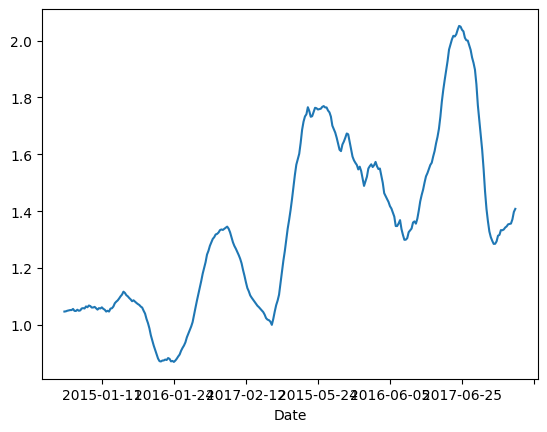

In [21]:
atl_df['AveragePrice'].rolling(25).mean().plot()
atl_df['price25ma'] = atl_df['AveragePrice'].rolling(25).mean()

In [26]:
df.values

array([[0, '2015-12-27', 1.33, ..., 'conventional', 2015, 'Albany'],
       [1, '2015-12-20', 1.35, ..., 'conventional', 2015, 'Albany'],
       [2, '2015-12-13', 0.93, ..., 'conventional', 2015, 'Albany'],
       ...,
       [9, '2018-01-21', 1.87, ..., 'organic', 2018, 'WestTexNewMexico'],
       [10, '2018-01-14', 1.93, ..., 'organic', 2018, 'WestTexNewMexico'],
       [11, '2018-01-07', 1.62, ..., 'organic', 2018, 'WestTexNewMexico']],
      shape=(18249, 14), dtype=object)

In [34]:
graph_df = pd.DataFrame()
for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton


KeyboardInterrupt: 

In [35]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [39]:
import pandas as pd

df = pd.read_csv("Avocado.csv")

df = df.copy()[df['type'] == "organic"]
df['Date'] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
graph_df = pd.DataFrame()
for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
df.head()
graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


California_price25ma  LasVegas_price25ma  PhoenixTucson_price25ma  \
Date                                                                            
2018-02-25                1.9128              1.9120                   1.7468   
2018-03-04                1.8876              1.8748                   1.7404   
2018-03-11                1.8636              1.8440                   1.7324   
2018-03-18                1.8516              1.8204                   1.7216   
2018-03-25                1.8364              1.7968                   1.7104   

            BuffaloRochester_price25ma  Spokane_price25ma  \
Date                                                        
2018-02-25                      1.2912             2.1544   
2018-03-04                      1.2744             2.1040   
2018-03-11                      1.2652             2.0552   
2018-03-18                      1.2560             2.0012   
2018-03-25                      1.2416             1.9496   

            LosAngeles_price25ma  Philadelphia_price25ma  Boston_price25ma  \
Date                                                                         
2018-02-25                1.9024                  1.6324            1.7636   
2018-03-04                1.8656                  1.6260            1.7708   
2018-03-11                1.8284                  1.6300            1.7824   
2018-03-18                1.8160                  1.6304            1.7932   
2018-03-25                1.8016                  1.6256            1.7984   

            StLouis_price25ma  Louisville_price25ma  ...  Houston_price25ma  \
Date                                                 ...                      
2018-02-25             1.9240                1.7044  ...             1.6132   
2018-03-04             1.8868                1.6816  ...             1.5960   
2018-03-11             1.8468                1.6508  ...             1.5696   
2018-03-18             1.8192                1.6176  ...             1.5360   
2018-03-25             1.7976                1.5844  ...             1.5128   

            Chicago_price25ma  Plains_price25ma  Indianapolis_price25ma  \
Date                                                                      
2018-02-25             1.8160            1.8116                  1.4928   
2018-03-04             1.8024            1.7900                  1.4744   
2018-03-11             1.7836            1.7672                  1.4540   
2018-03-18             1.7732            1.7452                  1.4320   
2018-03-25             1.7672            1.7232                  1.4160   

            SouthCentral_price25ma  Columbus_price25ma  Albany_price25ma  \
Date                                                                       
2018-02-25                  1.5728              1.6064            1.5112   
2018-03-04                  1.5592              1.5804            1.4992   
2018-03-11                  1.5400              1.5496            1.5044   
2018-03-18                  1.5204              1.5088            1.5140   
2018-03-25                  1.5072              1.4848            1.5188   

            Detroit_price25ma  NewOrleansMobile_price25ma  NewYork_price25ma  
Date                                                                          
2018-02-25             1.4980                      1.5384             1.9308  
2018-03-04             1.4692                      1.5288             1.9156  
2018-03-11             1.4444                      1.5076             1.9092  
2018-03-18             1.4092                      1.4860             1.8948  
2018-03-25             1.3964                      1.4616             1.8876  

[5 rows x 54 columns]

<Axes: xlabel='Date'>

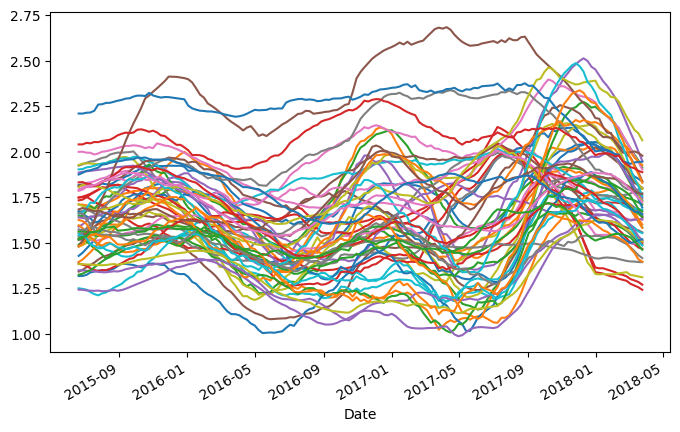

In [43]:
graph_df.dropna().plot(figsize=(8,5), legend=False)